In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2977 - accuracy: 0.9141 - val_loss: 0.1401 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1406 - accuracy: 0.9583 - val_loss: 0.1030 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9680 - val_loss: 0.0846 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0853 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0743 - accuracy: 0.9765 - val_loss: 0.0716 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.0715 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0718 - val_accuracy:

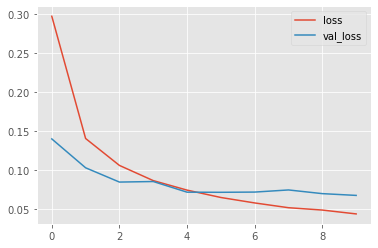

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()

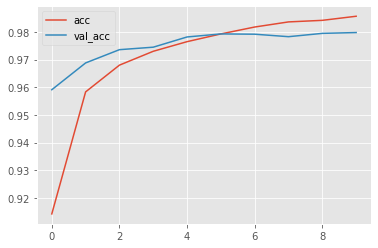

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.legend()

In [11]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9798
[0.06747237592935562, 0.9797999858856201]


Confusion matrix, without normalization
[[ 968    1    0    0    0    1    5    0    3    2]
 [   0 1126    2    1    0    0    1    1    4    0]
 [   2    1 1015    4    0    0    4    2    4    0]
 [   1    0    4  985    0    8    0    5    3    4]
 [   1    1    5    1  960    1    3    3    0    7]
 [   2    1    0    4    1  871    4    1    6    2]
 [   5    3    2    1    3    2  942    0    0    0]
 [   2    5   12    6    0    0    0  996    4    3]
 [   5    2    3    3    2    1    2    3  952    1]
 [   3    4    0    5    6    2    1    2    3  983]]


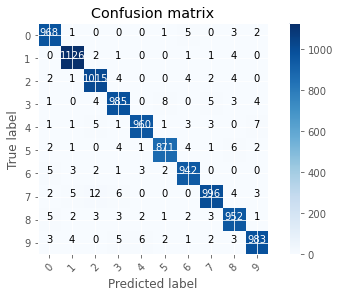

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

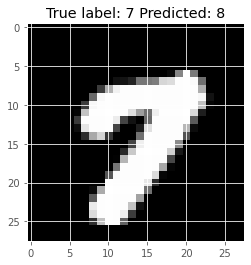

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));